## RETO-TEST PYTHON FOR DATA: ENUNCIADOS
La empresa ficticia "Global Importaciones" ha decidido implementar un sistema de gestión de pedidos utilizando la base de datos Northwind como referencia. La empresa se dedica a la importación y distribución de productos a nivel internacional. Como analista de datos para la empresa internacional "Global Importaciones", te enfrentas al desafío de extraer información clave de la base de datos Northwind para optimizar la gestión de pedidos. La dirección ha solicitado insights específicos para tomar decisiones informadas.
Para poder resolver este ejercicio primero, es necesario que instales la BBDD de 'Northwind' en Postgres/DBeaver, a continuación deberás generar una conexión entre Python y Postgres/DBeaver para poder realizar los siguientes ejercicios.

In [59]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

## Ejercicio 1. Familiarizarse con la Base de Datos: Descripción del ejercicio:
El primer paso como analista de datos es conocer la estructura y la información básica de nuestra BBDD, Crea el esquema de northwind y observa con atención las tablas que tiene y cómo están relacionadas entre sí.

<img src="northwind - public2.png">

## Ejercicio 2. Primeras consultas Descripción del ejercicio:
Ahora vamos a sacar información básica de nuestra BBDD, para ello tienes que generar las Queries necesarias para responder a las siguientes preguntas:

¿Cuántos empleados tenemos contratados en 'Global Importaciones'? Indica su id, nombre, apellido, ciudad y país.

¿Qué productos tenemos? Indica el id del producto, id del proveedor, nombre del producto, precio por unidad, unidades en stock, unidades pedidas al proveedor y productos descontinuados.

¿Tenemos productos descontinuados?. Indica el nombre del producto, y cantidad que nos queda en stock.  El atributo Discontinued es un booleano: si es igual a 1 el producto ha sido descontinuado.

¿Qué proveedores tenemos? Indica el id de la compañía, nombre de la compañía, ciudad y país.

¿Qué pedidos hemos tenido? Indica el número de pedido, id del cliente,id del transportista, dia del pedido, día requerido de llegada y día de llegada real.

¿Cuántos pedidos hemos tenido?

¿Cuántos clientes tenemos? Indica el id del cliente, nombre de la compañía, ciudad y país.

¿Con qué empresas de transporte trabajamos? Indica su id del transportista y el nombre de la compañía.

¿Cómo son las relaciones de reporte de resultados entre los empleados?



In [60]:
conn = psycopg2.connect(host = "localhost", 
                        database = "northwind",
                        user = "postgres", 
                        password = "131018")

In [61]:
# Creo una función para hacer las consultas

def  realizar_query (query):
    '''
    Función que realiza los pasos intermedios con el cursor y las modificaciones 
    necesarias para generar un DataFrame como output de la query que deseamos realizar
    
    Arguments: como argumento se debe pasar la query que se quiere realizar 
    
    Returns: Devuelve un DataFrame con la consulta realizada
    
    '''
    cursor = conn.cursor()
    cursor.execute(query)
    filas = cursor.fetchall()
    nombre_columnas = [columna.name for columna in cursor.description]
    cursor.close()
    tabla = pd.DataFrame(data=filas, columns=nombre_columnas)
    return tabla

In [62]:
query_1 = '''SELECT "employee_id", CONCAT("first_name", ' ', "last_name")AS "nombre_completo", "city", "country"
FROM employees '''
empleados = realizar_query(query_1)
empleados

,employee_id,nombre_completo,city,country
0,1,Nancy Davolio,Seattle,USA
1,2,Andrew Fuller,Tacoma,USA
2,3,Janet Leverling,Kirkland,USA
3,4,Margaret Peacock,Redmond,USA
4,5,Steven Buchanan,London,UK
5,6,Michael Suyama,London,UK
6,7,Robert King,London,UK
7,8,Laura Callahan,Seattle,USA
8,9,Anne Dodsworth,London,UK


In [63]:
query_2 = '''SELECT DISTINCT "product_id",  "supplier_id", "product_name", "unit_price", "units_in_stock", "units_on_order", "discontinued"
FROM products 
ORDER BY "product_id"'''

productos = realizar_query(query_2)
productos

,product_id,supplier_id,product_name,unit_price,units_in_stock,units_on_order,discontinued
0,1,8,Chai,18.00,39,0,1
1,2,1,Chang,19.00,17,40,1
2,3,1,Aniseed Syrup,10.00,13,70,0
3,4,2,Chef Anton's Cajun Seasoning,22.00,53,0,0
4,5,2,Chef Anton's Gumbo Mix,21.35,0,0,1
...,...,...,...,...,...,...,...
72,73,17,Röd Kaviar,15.00,101,0,0
73,74,4,Longlife Tofu,10.00,4,20,0
74,75,12,Rhönbräu Klosterbier,7.75,125,0,0
75,76,23,Lakkalikööri,18.00,57,0,0


In [64]:
query_3 ='''SELECT DISTINCT "product_name", "units_in_stock"
FROM products 
WHERE  "discontinued" = 1
ORDER BY "product_name"'''
stock_descontinuados = realizar_query(query_3)
stock_descontinuados

,product_name,units_in_stock
0,Alice Mutton,0
1,Chai,39
2,Chang,17
3,Chef Anton's Gumbo Mix,0
4,Guaraná Fantástica,20
5,Mishi Kobe Niku,29
6,Perth Pasties,0
7,Rössle Sauerkraut,26
8,Singaporean Hokkien Fried Mee,26
9,Thüringer Rostbratwurst,0


In [65]:
query_4 ='''SELECT DISTINCT "supplier_id", "company_name", "city",  "country"
FROM suppliers
ORDER BY "supplier_id"'''
proveedores = realizar_query(query_4)
proveedores

,supplier_id,company_name,city,country
0,1,Exotic Liquids,London,UK
1,2,New Orleans Cajun Delights,New Orleans,USA
2,3,Grandma Kelly's Homestead,Ann Arbor,USA
3,4,Tokyo Traders,Tokyo,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain
5,6,Mayumi's,Osaka,Japan
6,7,"Pavlova, Ltd.",Melbourne,Australia
7,8,"Specialty Biscuits, Ltd.",Manchester,UK
8,9,PB Knäckebröd AB,Göteborg,Sweden
9,10,Refrescos Americanas LTDA,Sao Paulo,Brazil


In [66]:
query_5 ='''SELECT "order_id","customer_id", "employee_id", "ship_via", "order_date", "required_date", "shipped_date","freight"
FROM orders
ORDER BY "order_id"'''
pedidos = realizar_query(query_5)
pedidos

,order_id,customer_id,employee_id,ship_via,order_date,required_date,shipped_date,freight
0,10248,VINET,5,3,1996-07-04,1996-08-01,1996-07-16,32.38
1,10249,TOMSP,6,1,1996-07-05,1996-08-16,1996-07-10,11.61
2,10250,HANAR,4,2,1996-07-08,1996-08-05,1996-07-12,65.83
3,10251,VICTE,3,1,1996-07-08,1996-08-05,1996-07-15,41.34
4,10252,SUPRD,4,2,1996-07-09,1996-08-06,1996-07-11,51.30
...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,2,1998-05-05,1998-06-02,None,24.95
826,11074,SIMOB,7,2,1998-05-06,1998-06-03,None,18.44
827,11075,RICSU,8,2,1998-05-06,1998-06-03,None,6.19
828,11076,BONAP,4,2,1998-05-06,1998-06-03,None,38.28


In [67]:
pedidos['order_id'].count()

np.int64(830)

In [68]:
query_6 ='''SELECT COUNT ("order_id") AS "total_pedidos" FROM orders'''
tabla_6 = realizar_query(query_6)
tabla_6

,total_pedidos
0,830


In [69]:
query_7 ='''SELECT "customer_id", "company_name", "city", "country"
FROM customers'''
clientes = realizar_query(query_7)
clientes

,customer_id,company_name,city,country
0,ALFKI,Alfreds Futterkiste,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,México D.F.,Mexico
2,ANTON,Antonio Moreno Taquería,México D.F.,Mexico
3,AROUT,Around the Horn,London,UK
4,BERGS,Berglunds snabbköp,Luleå,Sweden
...,...,...,...,...
86,WARTH,Wartian Herkku,Oulu,Finland
87,WELLI,Wellington Importadora,Resende,Brazil
88,WHITC,White Clover Markets,Seattle,USA
89,WILMK,Wilman Kala,Helsinki,Finland


In [70]:
query_8='''SELECT shipper_id, company_name
FROM shippers'''
transportistas= realizar_query(query_8)
transportistas

,shipper_id,company_name
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping
3,4,Alliance Shippers
4,5,UPS
5,6,DHL


In [71]:
query_9 ='''SELECT "employee_id", "reports_to"
FROM employees'''
report_to= realizar_query(query_9)
report_to

,employee_id,reports_to
0,1,2.0
1,2,NaN
2,3,2.0
3,4,2.0
4,5,2.0
5,6,5.0
6,7,5.0
7,8,2.0
8,9,5.0



## Ejercicio 3. Análisis de la empresa

Vamos a crear un par de DataFrames uno con la información de las tablas de pedidos y clientes y otro con la información de productos, proveedores y detalles de los pedidos para poder hacer un estudio de la evolución de nuestra empresa y qué cosas podemos mejorar de esta.

- Haz un estudio de la evolución de los pedidos realizados a lo largo del tiempo. Para ello primero realiza la query necesaria para obtener los meses, años y pedidos durante cada mes. A continuación crea una línea temporal para ver dicha evolución

- Investiga cuáles son los países donde tenemos más ventas (País origen de la compañía). No es necesario realizar una query para obtener el DataFrame. A raíz de estos datos genera una columna con el continente a partir del siguiente diccionario: 
=(continentes
{'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France',
'Germany', 'Ireland', 'Italy', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden',
'Switzerland', 'UK'], 'America': ['Argentina', 'Brazil', 'Canada', 'Mexico', 'USA', 'Venezuela'] })
Y estudia la distribucion de pedidios por continente
- Sabemos que algunos pedidos han llegado con retraso, además hay pedidos que no ha sido registrada su llegada. Investiga si la compañía de transporte está relacionada con ello o no. Realiza un boxplot para ver la diferencia de rango intercuartílico.

- Hay bastante diferencia entre el precio pagado en cada pedido. Averigüa la distribución media del precio del pedido por país de procedencia del cliente. Realiza la visualización que creas más conveniente para sacar conclusiones

- Investiga si existen clientes que no hayan pedido nunca. ¿Qué porcentaje de clientes no tienen pedidos registrados?

- Estudia los productos más demandados e investiga cuáles corre prisa hacer reestock (Los que quedan 20 o menos y no hay unidades pedidas). Realiza la visualización que creas más conveniente para sacar conclusiones.

In [72]:
## Generamos un dataframe con pedidos y clientes

clien_pedidos = pedidos.merge(clientes, how= 'outer', on='customer_id')

clien_pedidos

,order_id,customer_id,employee_id,ship_via,order_date,required_date,shipped_date,freight,company_name,city,country
0,10643.0,ALFKI,6.0,1.0,1997-08-25,1997-09-22,1997-09-02,29.46,Alfreds Futterkiste,Berlin,Germany
1,10692.0,ALFKI,4.0,2.0,1997-10-03,1997-10-31,1997-10-13,61.02,Alfreds Futterkiste,Berlin,Germany
2,10702.0,ALFKI,4.0,1.0,1997-10-13,1997-11-24,1997-10-21,23.94,Alfreds Futterkiste,Berlin,Germany
3,10835.0,ALFKI,1.0,3.0,1998-01-15,1998-02-12,1998-01-21,69.53,Alfreds Futterkiste,Berlin,Germany
4,10952.0,ALFKI,1.0,1.0,1998-03-16,1998-04-27,1998-03-24,40.42,Alfreds Futterkiste,Berlin,Germany
...,...,...,...,...,...,...,...,...,...,...,...
827,10792.0,WOLZA,1.0,3.0,1997-12-23,1998-01-20,1997-12-31,23.79,Wolski Zajazd,Warszawa,Poland
828,10870.0,WOLZA,5.0,3.0,1998-02-04,1998-03-04,1998-02-13,12.04,Wolski Zajazd,Warszawa,Poland
829,10906.0,WOLZA,4.0,3.0,1998-02-25,1998-03-11,1998-03-03,26.29,Wolski Zajazd,Warszawa,Poland
830,10998.0,WOLZA,8.0,2.0,1998-04-03,1998-04-17,1998-04-17,20.31,Wolski Zajazd,Warszawa,Poland


In [73]:
# Generamos otro DataFrame para productos proveedores y detalles de los pedidos. 
detalles = realizar_query('''SELECT * FROM "order_details"''')
productos_proveedores_detallespedidos = proveedores.merge(productos.merge(detalles, how='outer', on='product_id'),how='outer',on='supplier_id')
productos_proveedores_detallespedidos

,supplier_id,company_name,city,country,product_id,product_name,unit_price_x,units_in_stock,units_on_order,discontinued,order_id,unit_price_y,quantity,discount
0,1,Exotic Liquids,London,UK,2,Chang,19.0,17,40,1,10255,15.2,20,0.00
1,1,Exotic Liquids,London,UK,2,Chang,19.0,17,40,1,10258,15.2,50,0.20
2,1,Exotic Liquids,London,UK,2,Chang,19.0,17,40,1,10264,15.2,35,0.00
3,1,Exotic Liquids,London,UK,2,Chang,19.0,17,40,1,10298,15.2,40,0.00
4,1,Exotic Liquids,London,UK,2,Chang,19.0,17,40,1,10327,15.2,25,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,29,Forêts d'érables,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.3,17,0,0,10949,49.3,60,0.00
2151,29,Forêts d'érables,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.3,17,0,0,10966,49.3,12,0.15
2152,29,Forêts d'érables,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.3,17,0,0,10988,49.3,40,0.10
2153,29,Forêts d'érables,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.3,17,0,0,11027,49.3,21,0.25


In [74]:
query = '''SELECT EXTRACT(MONTH FROM "order_date") AS "Mes",
                      EXTRACT(YEAR FROM "order_date") AS "Año", 
                      COUNT(DISTINCT "order_id") AS "Pedidos_Mes"
FROM orders
GROUP BY "Mes", "Año"
ORDER BY "Mes", "Año"'''
pedidos_tiempo = realizar_query(query)
pedidos_tiempo


,Mes,Año,Pedidos_Mes
0,1,1997,33
1,1,1998,55
2,2,1997,29
3,2,1998,54
4,3,1997,30
5,3,1998,73
6,4,1997,31
7,4,1998,74
8,5,1997,32
9,5,1998,14


In [75]:
pedidos_tiempo ['Fecha']= pd.to_datetime({'year':pedidos_tiempo['Año'], 'month':pedidos_tiempo['Mes'], 'day':1})
pedidos_tiempo.sort_values(by='Fecha', inplace=True)
pedidos_tiempo

,Mes,Año,Pedidos_Mes,Fecha
11,7,1996,22,1996-07-01
13,8,1996,25,1996-08-01
15,9,1996,23,1996-09-01
17,10,1996,26,1996-10-01
19,11,1996,25,1996-11-01
21,12,1996,31,1996-12-01
0,1,1997,33,1997-01-01
2,2,1997,29,1997-02-01
4,3,1997,30,1997-03-01
6,4,1997,31,1997-04-01


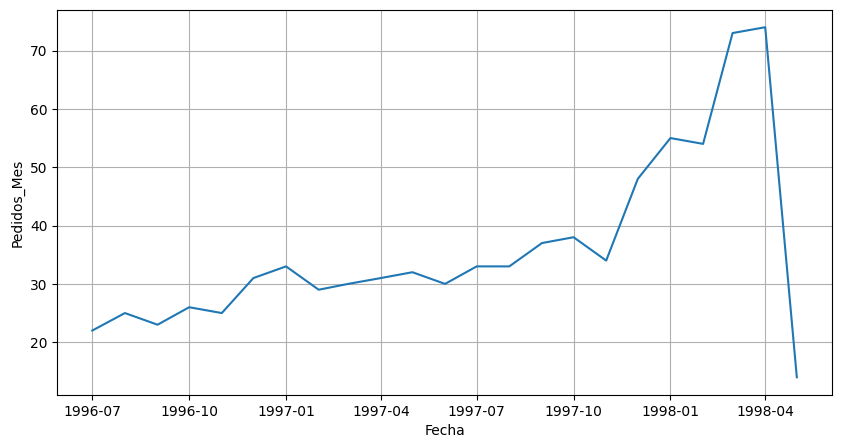

In [76]:
figura_1 = plt.figure(figsize=(10,5))
figura_1 = sns.lineplot(data= pedidos_tiempo
                        ,x= pedidos_tiempo['Fecha']
                        ,y= pedidos_tiempo['Pedidos_Mes'])
figura_1 = plt.grid(True)
figura_1         

Investiga cuáles son los países donde tenemos más ventas (País origen de la compañía). No es necesario realizar una query para obtener el DataFrame. A raíz de estos datos genera una columna con el continente a partir del siguiente diccionario: (Diccionario continentes)

In [77]:
pedidos_pais= clien_pedidos.groupby('country')['order_id'].count().reset_index().sort_values(by='order_id',ascending=False)
pedidos_pais

,country,order_id
8,Germany,122
19,USA,122
3,Brazil,83
7,France,77
18,UK,56
20,Venezuela,46
1,Austria,40
16,Sweden,37
4,Canada,30
11,Mexico,28


In [78]:
continentes = {'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France',
 'Germany', 'Ireland', 'Italy', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden',
 'Switzerland', 'UK'],'America': ['Argentina', 'Brazil', 'Canada', 'Mexico', 'USA', 'Venezuela']}



In [79]:
def asignar_continente (pedidos_pais_df):
    for continente, pais in continentes.items():
        if pedidos_pais_df in pais:
            return continente


In [80]:
pedidos_pais['continente'] = pedidos_pais['country'].map(asignar_continente)

pedidos_continente = pedidos_pais.groupby('continente')['order_id'].sum().reset_index().sort_values(by='order_id',ascending=False)
pedidos_continente

,continente,order_id
1,Europe,505
0,America,325


([<matplotlib.patches.Wedge at 0x12d948b50>,
 [Text(-0.3729380958124814, 1.034851282403303, 'Europe'),
  Text(0.37293806291817105, -1.0348512942577026, 'America')])

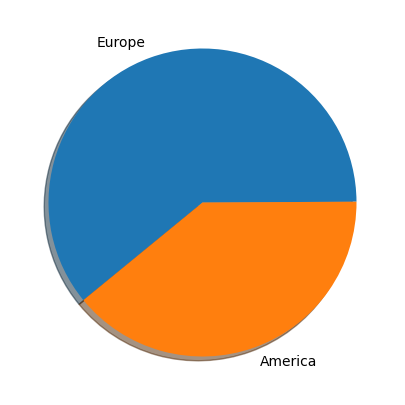

In [81]:
figura_2 = plt.figure(figsize=(10,5))
figura_2 = plt.pie(data=pedidos_continente
                   , x= 'order_id'
                   ,labels= 'continente'
                   ,shadow= True
                   ,startangle=0.3)
figura_2

In [82]:
clien_pedidos['Días de Retraso']= (pd.to_datetime(clien_pedidos['shipped_date']) - pd.to_datetime(clien_pedidos['required_date'])).dt.days
pedidos_retraso_shipper = clien_pedidos.merge(transportistas, how='inner', left_on='ship_via', right_on='shipper_id')
pedidos_retraso_shipper.rename(columns={'company_name_y':'compañia_transporte'},inplace=True)
retraso_transporte = pedidos_retraso_shipper[['compañia_transporte', 'Días de Retraso']]
retraso_transporte

,compañia_transporte,Días de Retraso
0,Speedy Express,-20.0
1,United Package,-18.0
2,Speedy Express,-34.0
3,Federal Shipping,-22.0
4,Speedy Express,-34.0
...,...,...
825,Federal Shipping,-20.0
826,Federal Shipping,-19.0
827,Federal Shipping,-8.0
828,United Package,0.0


In [83]:
figura_3 = px.box(data_frame=retraso_transporte
                  ,y= 'Días de Retraso'
                  ,color= 'compañia_transporte')
plt.show()
figura_3


In [84]:
lista_compañias = retraso_transporte['compañia_transporte'].unique().tolist()
lista_compañias

['Speedy Express', 'United Package', 'Federal Shipping']

In [85]:
for empresa in lista_compañias:
    retraso_transporte_2 = retraso_transporte[retraso_transporte['compañia_transporte']==empresa]
    nulos_porcentaje = retraso_transporte_2['Días de Retraso'].isnull().sum()/retraso_transporte_2.shape[0]*100
    print(f'La empresa {empresa} no ha registrado un {round(nulos_porcentaje,2)}% de los viajes')

La empresa Speedy Express no ha registrado un 1.61% de los viajes
La empresa United Package no ha registrado un 3.37% de los viajes
La empresa Federal Shipping no ha registrado un 2.35% de los viajes



- Hay bastante diferencia entre el precio pagado en cada pedido. Averigüa la distribución media del precio del pedido por país de procedencia del cliente. Realiza la visualización que creas más conveniente para sacar conclusiones

In [86]:
detalles ['total_producto'] = (detalles ['unit_price']* detalles['quantity']) - (detalles['discount']* detalles ['unit_price']* detalles['quantity'])
total_pedido_suma = round(detalles.groupby('order_id')['total_producto'].sum(),2).reset_index()
total_pedido_suma

,order_id,total_producto
0,10248,440.00
1,10249,1863.40
2,10250,1552.60
3,10251,654.06
4,10252,3597.90
...,...,...
825,11073,300.00
826,11074,232.08
827,11075,498.10
828,11076,792.75


In [87]:
pedidos_pais.columns

Index(['country', 'order_id', 'continente'], dtype='object')

In [88]:
total_pedidos = total_pedido_suma.merge(clien_pedidos, how='inner', on='order_id')
total_pedidos_pais_media = round(total_pedidos.groupby('country')['total_producto'].mean(),2).reset_index().sort_values(by= 'total_producto', ascending= False)
total_pedidos_pais_media

,country,total_producto
1,Austria,3200.10
9,Ireland,2630.52
19,USA,2012.99
8,Germany,1887.58
5,Denmark,1814.50
2,Belgium,1780.26
17,Switzerland,1760.70
4,Canada,1673.21
16,Sweden,1472.84
3,Brazil,1288.26


In [89]:
figura_4 = px.bar(data_frame=total_pedidos_pais_media
                  , x= 'country'
                  , y= 'total_producto')
figura_4.show()


Investiga si existen clientes que no hayan pedido nunca. ¿Qué porcentaje de clientes no tienen pedidos registrados?

In [90]:
clientes_sin_pedido = clien_pedidos.loc[clien_pedidos['order_id'].isnull()]['customer_id'].reset_index()
clientes_sin_pedido

,index,customer_id
0,188,FISSA
1,501,PARIS


In [91]:
porcentaje_sin_pedido = clientes_sin_pedido.shape[0]/clien_pedidos.shape[0]*100
print(f'El porcentaje de clientes que no tienen pedidos es {porcentaje_sin_pedido:2f}')

El porcentaje de clientes que no tienen pedidos es 0.240385


Estudia los productos más demandados e investiga cuáles corre prisa hacer reestock Los que quedan 20 o menos y no hay unidades pedidas). Realiza la visualización que creas más conveniente para sacar conclusiones.

In [92]:
productos_proveedores_detallespedidos.columns

Index(['supplier_id', 'company_name', 'city', 'country', 'product_id',
       'product_name', 'unit_price_x', 'units_in_stock', 'units_on_order',
       'discontinued', 'order_id', 'unit_price_y', 'quantity', 'discount'],
      dtype='object')

In [93]:
productos_demandados = productos_proveedores_detallespedidos.groupby('product_name')['order_id'].count().reset_index().sort_values('order_id', ascending=False)
productos_demandados

,product_name,order_id
51,Raclette Courdavault,54
18,Gorgonzola Telino,51
21,Guaraná Fantástica,51
3,Camembert Pierrot,51
17,Gnocchi di nonna Alice,50
...,...,...
35,Louisiana Hot Spiced Okra,8
10,Chocolade,6
20,Gravad lax,6
16,Genen Shouyu,6


In [94]:
figura_5 = px.bar(productos_demandados,x='product_name', y = 'order_id')
figura_5

In [95]:
restock= productos_proveedores_detallespedidos[(productos_proveedores_detallespedidos['units_in_stock']<=20) & (productos_proveedores_detallespedidos['units_on_order']==0)& (productos_proveedores_detallespedidos['discontinued']==0)]['product_name'].reset_index()
restock['product_name'].unique()

array(["Uncle Bob's Organic Dried Pears", 'Northwoods Cranberry Sauce',
       'Gumbär Gummibärchen', 'Nord-Ost Matjeshering',
       'Mozzarella di Giovanni', 'Steeleye Stout', 'Côte de Blaye',
       'Manjimup Dried Apples', 'Camembert Pierrot', 'Tarte au sucre'],
      dtype=object)

In [96]:
#Como ya tengo ordenada la preferencia de los productos en productos_demandados, ordeno la lista de restock en base al orden de productos_demandados
lista_restock=restock['product_name'].unique().tolist()
indices = productos_demandados.index[productos_demandados['product_name'].isin(lista_restock)]
lista_restock_ordenada= productos_demandados.loc[indices,'product_name'].tolist()
lista_restock_ordenada

['Camembert Pierrot',
 'Tarte au sucre',
 'Manjimup Dried Apples',
 'Mozzarella di Giovanni',
 'Steeleye Stout',
 'Nord-Ost Matjeshering',
 'Gumbär Gummibärchen',
 "Uncle Bob's Organic Dried Pears",
 'Côte de Blaye',
 'Northwoods Cranberry Sauce']


Ejercicio 4. Queries Avanzadas
Nuestro jefe acaba de venir y nos ha hecho una serie de peticiones sobre la base de datos que tenemos que poder contestar.


Quiere saber cuándo fue la última vez que se pidió un producto de cada catgoría.

In [97]:
query_10 = '''SELECT c."category_name" AS "Categoría", MAX(o."order_date") AS "Ultima_Fecha"
FROM categories AS c
INNER JOIN products AS p ON p.category_id = c.category_id
INNER JOIN order_details AS od ON od.product_id = p.product_id
INNER JOIN orders AS o ON o.order_id = od.order_id
GROUP BY c.category_name
'''
ultimo_pedido= realizar_query(query_10)
ultimo_pedido

,Categoría,Ultima_Fecha
0,Beverages,1998-05-06
1,Produce,1998-05-06
2,Condiments,1998-05-06
3,Grains/Cereals,1998-05-06
4,Meat/Poultry,1998-05-06
5,Confections,1998-05-06
6,Dairy Products,1998-05-06
7,Seafood,1998-05-06



Necesita saber si existe algún producto que nunca se haya vendido por su precio original.

In [98]:
productos_proveedores_detallespedidos.columns


Index(['supplier_id', 'company_name', 'city', 'country', 'product_id',
       'product_name', 'unit_price_x', 'units_in_stock', 'units_on_order',
       'discontinued', 'order_id', 'unit_price_y', 'quantity', 'discount'],
      dtype='object')

In [99]:
agrupados = productos_proveedores_detallespedidos.groupby(['product_id','product_name']).agg({'unit_price_x': 'max', 'unit_price_y': 'max'})
agrupados_filtrados = agrupados[agrupados['unit_price_x']!=agrupados['unit_price_y']]
agrupados_filtrados


,,unit_price_x,unit_price_y
product_id,product_name,,
15,Genen Shouyu,13.0,15.5


Solo tenemos un producto que nunca se haya vendido por su precio original

In [100]:
recuento_precio_original = productos_proveedores_detallespedidos.groupby(['product_id','product_name']).apply(
    lambda x: (x['unit_price_x'] == x['unit_price_y']).sum()).reset_index(name='NUM Precio Original').sort_values(by='NUM Precio Original',ascending=False)
recuento_precio_original

/var/folders/jt/_dxl46sx52n__x2mgkp7jpjr0000gn/T/ipykernel_11878/2859132760.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,product_id,product_name,NUM Precio Original
59,60,Camembert Pierrot,37
23,24,Guaraná Fantástica,36
40,41,Jack's New England Clam Chowder,36
58,59,Raclette Courdavault,35
74,75,Rhönbräu Klosterbier,35
...,...,...,...
8,9,Mishi Kobe Niku,4
47,48,Chocolade,4
65,66,Louisiana Hot Spiced Okra,4
36,37,Gravad lax,3


De esta manera hemos obtenido la cantidad de veces que hemos vendido cada producto por su precio original
Con este DataFrame, también podríamos haber respondido a la pregunta anterior ya que tenemos un solo  producto con un valor 0 que quiere decir que nunca ha sido vendido por su precio original. 

Quiere tener toda la información necesaria para poder identificar un tipo de producto. En concreto, tienen especial interés por los productos con categoría "Confections". Devuelve el ID del producto, el nombre del producto y su ID de categoría.


In [101]:
query_11= '''SELECT product_id, product_name,category_id
FROM products
WHERE category_id = (
    SELECT category_id 
    FROM categories
    WHERE category_name = 'Confections'
)
'''

confections = realizar_query(query_11)
confections

,product_id,product_name,category_id
0,16,Pavlova,3
1,19,Teatime Chocolate Biscuits,3
2,20,Sir Rodney's Marmalade,3
3,21,Sir Rodney's Scones,3
4,25,NuNuCa Nuß-Nougat-Creme,3
5,26,Gumbär Gummibärchen,3
6,27,Schoggi Schokolade,3
7,47,Zaanse koeken,3
8,48,Chocolade,3
9,49,Maxilaku,3



Quiere saber si existe algún proveedor del que pueda prescindir ya que todos los productos que tiene se encuentran descontinuados.

In [102]:
productos_proveedores_detallespedidos.columns

Index(['supplier_id', 'company_name', 'city', 'country', 'product_id',
       'product_name', 'unit_price_x', 'units_in_stock', 'units_on_order',
       'discontinued', 'order_id', 'unit_price_y', 'quantity', 'discount'],
      dtype='object')

In [103]:
proveedores_productos_descontinuados = productos_proveedores_detallespedidos[['supplier_id', 'company_name', 'discontinued','product_id']]
proveedores_productos_descontinuados

,supplier_id,company_name,discontinued,product_id
0,1,Exotic Liquids,1,2
1,1,Exotic Liquids,1,2
2,1,Exotic Liquids,1,2
3,1,Exotic Liquids,1,2
4,1,Exotic Liquids,1,2
...,...,...,...,...
2150,29,Forêts d'érables,0,62
2151,29,Forêts d'érables,0,62
2152,29,Forêts d'érables,0,62
2153,29,Forêts d'érables,0,62


In [104]:
resumen_proveedores = proveedores_productos_descontinuados.groupby('company_name').agg(
    productos_no_descontinuados = ('discontinued', lambda x: x.count()-x.sum())).reset_index().sort_values(by='productos_no_descontinuados')
    
resumen_proveedores

,company_name,productos_no_descontinuados
24,Refrescos Americanas LTDA,0
4,Exotic Liquids,12
3,Escargots Nouveaux,18
28,Zaanse Snoepfabriek,27
18,Nord-Ost-Fisch Handelsgesellschaft mbH,32
20,PB Knäckebröd AB,34
13,Lyngbysild,41
27,Tokyo Traders,46
26,Svensk Sjöföda AB,51
2,Cooperativa de Quesos 'Las Cabras',52


In [105]:
proveedores_prescindibles = resumen_proveedores[resumen_proveedores['productos_no_descontinuados']==0]
proveedores_prescindibles

,company_name,productos_no_descontinuados
24,Refrescos Americanas LTDA,0


Extraer los clientes que compraron mas de 30 articulos "Chai" en un único pedido

In [106]:
query_12 = '''
SELECT o."order_id" AS "OrderID" , 
					  o."customer_id", 
                      c."company_name" AS "Cliente"
FROM "orders" AS o
INNER JOIN "customers" AS c
ON o."customer_id" = c."customer_id"
WHERE "order_id" IN (
	SELECT "order_id"
	FROM "order_details"
	WHERE "quantity">= 30
	AND "product_id" = (
		SELECT "product_id"
		FROM "products"
		WHERE "product_name" = 'Chai'))
'''

clientes_chai_30 = realizar_query(query_12)
clientes_chai_30

,OrderID,customer_id,Cliente
0,10285,QUICK,QUICK-Stop
1,10522,LEHMS,Lehmanns Marktstand
2,10689,BERGS,Berglunds snabbköp
3,10691,QUICK,QUICK-Stop
4,10729,LINOD,LINO-Delicateses
5,10847,SAVEA,Save-a-lot Markets
6,10869,SEVES,Seven Seas Imports
7,10918,BOTTM,Bottom-Dollar Markets
8,11031,SAVEA,Save-a-lot Markets
9,11070,LEHMS,Lehmanns Marktstand


Indica los clientes cuya suma total de carga en los pedidos sea mayor de 1000

In [116]:
carga_total= clien_pedidos.groupby(['customer_id','company_name'])['freight'].sum().reset_index()
carga_total
carga_1000= carga_total[carga_total['freight']>1000]
carga_1000

,customer_id,company_name,freight
4,BERGS,Berglunds snabbköp,1559.52
8,BONAP,Bon app',1357.87
19,ERNSH,Ernst Handel,6205.39
23,FOLKO,Folk och fä HB,1678.08
24,FRANK,Frankenversand,1403.44
31,GREAL,Great Lakes Food Market,1087.61
34,HILAA,HILARION-Abastos,1259.16
36,HUNGO,Hungry Owl All-Night Grocers,2755.24
43,LEHMS,Lehmanns Marktstand,1017.03
50,MEREP,Mère Paillarde,1394.22


Desde recursos humanos nos piden seleccionar los nombres de las ciudades con 3 o más empleadas de cara a estudiar la apertura de nuevas oficinas. (he corregido el 5 original por el 3 que se comento en clase)

In [134]:
recuento_empleados_3 = empleados.groupby('city').filter(lambda x: x['city'].count()>3)['city'].unique().tolist()
recuento_empleados_3

['London']